In [181]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline



In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, ElasticNet, LassoCV, Lasso

import patsy

In [183]:
def pred_target(df):
    df.drop('Unnamed: 0', axis=1, inplace=True)
    X = df[[x for x in df.columns if x not in ['price','bhk']]]
    y = df.price.values
    target = np.log(y)
    formula = "target ~ "+' + '.join(X)+' -1'
    y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
    y = y.values.ravel()
    return X, y
    

In [184]:
copenhagen = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/Copenhagen_dfm.csv',
                         
                   encoding='utf8')

In [185]:
X, y = pred_target(copenhagen)

In [186]:
Xn = StandardScaler().fit_transform(X)

In [187]:
Xn_train, Xn_test, y_train, y_test = train_test_split(Xn, y, test_size = 0.3)

In [188]:
#X.drop('level_0', axis=1, inplace=True)

In [189]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [190]:
#X_train.shape, X_test.shape

In [191]:
linmod = LinearRegression()

In [192]:
scores = cross_val_score(linmod, Xn_train, y_train, cv = 10)
print scores
print np.mean(scores)
print np.std(scores)

[ 0.49013158  0.52490621  0.50186048  0.54379189  0.51110988  0.53584426
  0.51321693  0.46615396  0.55863478  0.55121666]
0.519686662258
0.0274825655883


In [193]:
predictions = cross_val_predict(linmod, Xn_test, y_test, cv = 10) 
accuracy = metrics.r2_score(y_test, predictions)
print accuracy


0.543870712779


In [194]:
residuals = y_test - predictions
residuals

array([-0.05816075, -0.13085362, -0.01889332, ...,  0.57123204,
       -0.2336805 ,  0.30669677])

In [195]:
np.mean(predictions)


4.6151988437864988

In [196]:
linmod.fit(Xn_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [197]:
linmod.coef_

array([  1.75576068e+10,   2.07448776e+11,   2.33646298e+11,
         2.08614184e+11,   1.19703853e+11,   3.95250179e+11,
         2.34276439e+11,  -3.83671386e+11,   2.67131031e+11,
         2.91294189e+11,  -1.84509277e-01,  -6.91070557e-02,
         3.94897461e-02,   1.84837341e-01,  -5.49538541e+11,
        -5.25573124e+11,  -3.18126336e+11,  -3.00750732e-02,
         2.89916992e-03,   5.98159282e+11,   9.00268555e-03,
         4.02225283e+11])

In [198]:
linmod_coef = pd.DataFrame({
        'variable':X_train.columns,
        'coef':lasso.coef_,
        'abscoef':np.abs(linmod.coef_)
    })

linmod_coef.sort_values('abscoef', ascending=False, inplace=True)
linmod_coef[linmod_coef.coef != 0].head(25)
linmod_coef = linmod_coef.reset_index(drop=True)

In [215]:
linmod_coef

,abscoef,coef,variable
0,5.981593e+11,-0.013716,rest_count
1,5.495385e+11,-0.058874,dist_arprt
2,5.255731e+11,0.000000,host_count
3,4.022253e+11,0.013037,reviews_count
4,3.952502e+11,-0.000000,neighborhood[Norrebro]
5,3.836714e+11,-0.000000,neighborhood[Valby]
6,3.181263e+11,0.000000,metrostn_count
7,2.912942e+11,0.033413,neighborhood[Vesterbro-Kongens Enghave]
8,2.671310e+11,-0.000000,neighborhood[Vanlose]
9,2.342764e+11,0.004545,neighborhood[Osterbro]


In [199]:
print np.mean(y_train), np.mean(y_test)

4.61477888288 4.61542208173


In [200]:
# Regularization: Gridsearch an optimal ElasticNet regression

In [201]:
# enet_cv = ElasticNetCV(l1_ratio=np.linspace(0.01, 1., 50), n_alphas=300, cv=10, verbose=1)
# enet_cv.fit(Xn_train, y_train)


In [202]:
# print enet_cv.l1_ratio_
# print enet_cv.alpha_

In [203]:
# enet = ElasticNet(alpha= enet_cv.alpha_, l1_ratio=enet_cv.l1_ratio_)

# y_pred_enet = enet.fit(Xn_train, y_train).predict(Xn_test)
# r2_score_enet = metrics.r2_score(y_test, y_pred_enet)
# print(enet)
# print("r^2 on test data : %f" % r2_score_enet)


In [204]:
lassocv = LassoCV(n_alphas=300, cv=10)

In [205]:
lassocv.fit(Xn_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=300, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [206]:
lassocv.alpha_

0.00024730749198215082

In [207]:
lasso = Lasso(alpha=lassocv.alpha_)

y_pred_lasso = lasso.fit(Xn_train, y_train).predict(Xn_test)
r2_score_lasso = metrics.r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)


Lasso(alpha=0.00024730749198215082, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.546865


In [208]:
residuals1 = y_test - y_pred_lasso

In [209]:
lasso.fit(Xn_train, y_train)

lasso_coef = pd.DataFrame({
        'variable':X_train.columns,
        'coef':lasso.coef_,
        'abscoef':np.abs(lasso.coef_)
    })

lasso_coef.sort_values('abscoef', ascending=False, inplace=True)
lasso_coef[lasso_coef.coef != 0].head(25)


,abscoef,coef,variable
13,0.184578,0.184578,bedrooms
10,0.184419,-0.184419,room_type[T.Private room]
4,0.104299,0.104299,neighborhood[Indre By]
11,0.069023,-0.069023,room_type[T.Shared room]
14,0.055665,-0.055665,dist_arprt
12,0.039345,0.039345,bathrooms
0,0.037208,-0.037208,neighborhood[Amager East]
9,0.033909,0.033909,neighborhood[Vesterbro-Kongens Enghave]
2,0.029948,-0.029948,neighborhood[Bispebjerg]
17,0.029857,-0.029857,minstay


In [210]:
lasso_coef = lasso_coef.reset_index(drop=True)


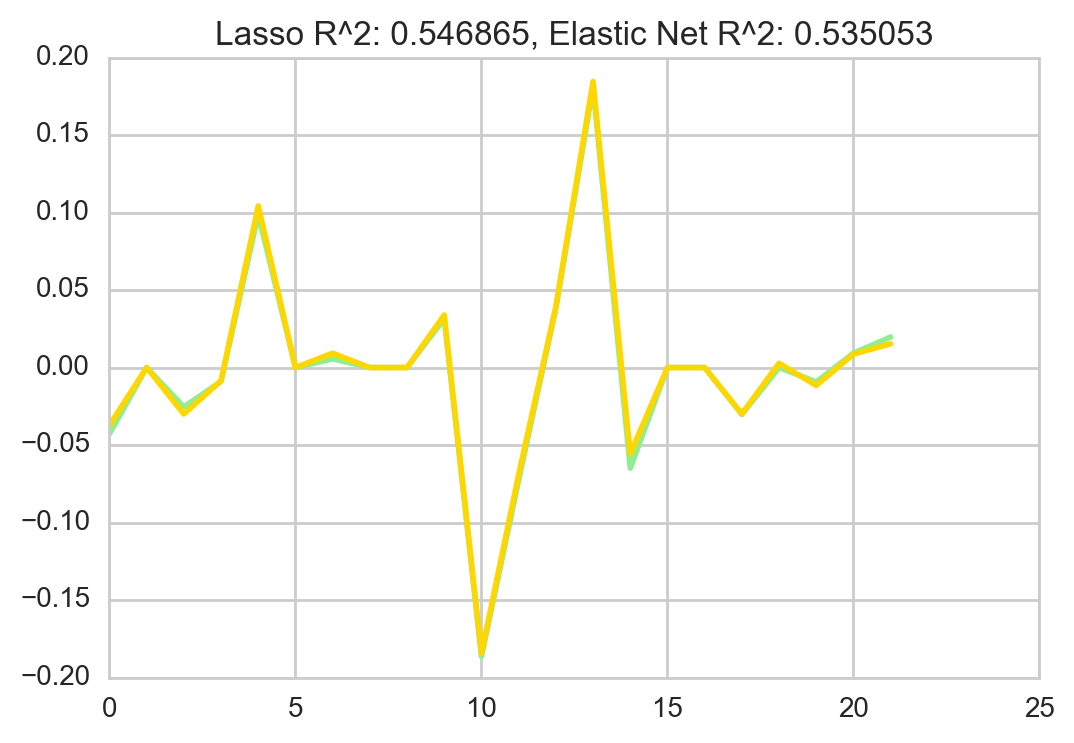

In [211]:
plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lassocv.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
#plt.plot(linmod.coef_, '--', color='navy', label='original coefficients')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.show()

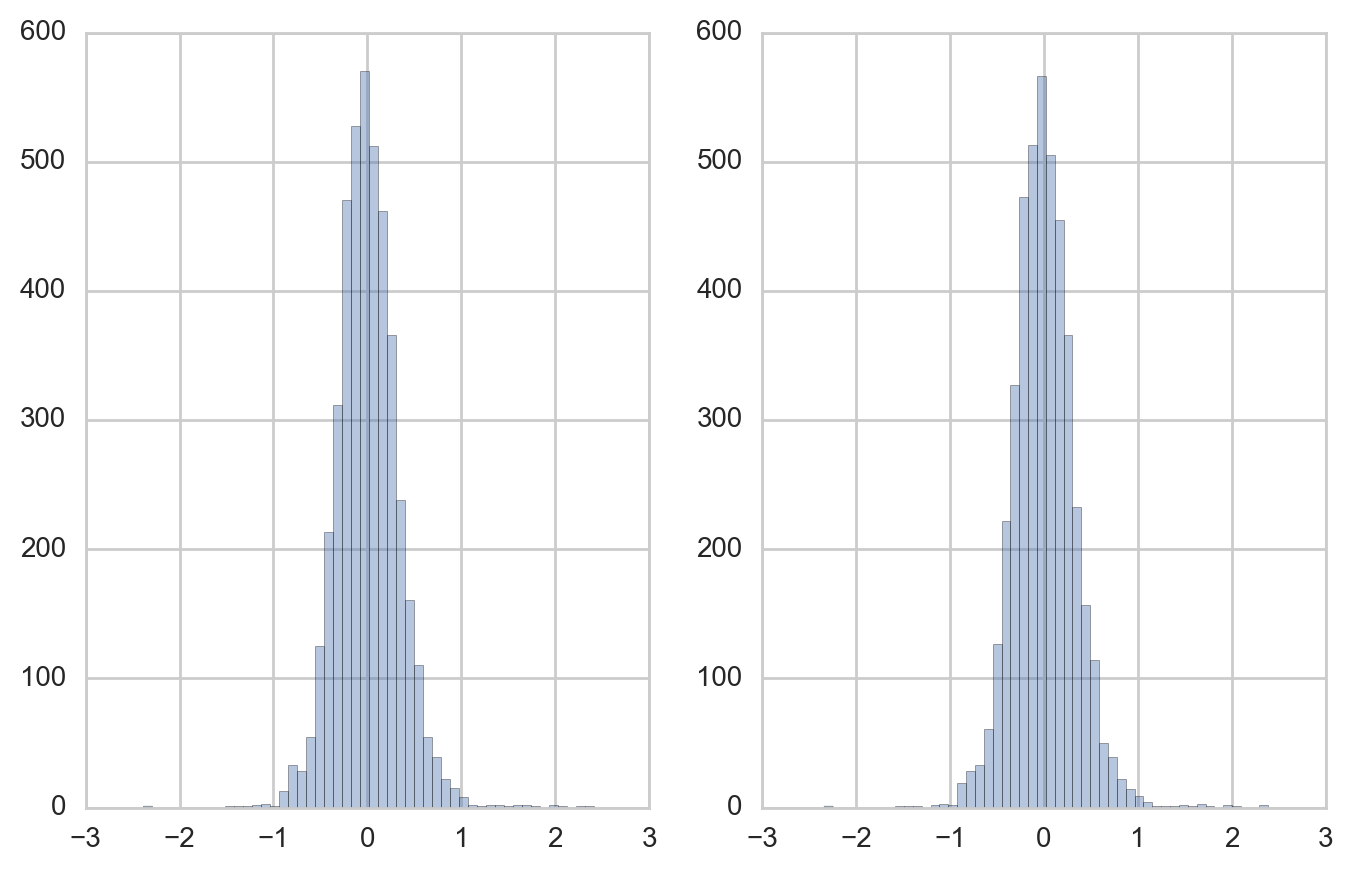

In [212]:
# plt.plot(residuals, '--', color='navy', label='original coefficients')
# plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
#           % (r2_score_lasso, r2_score_enet))
# plt.show()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,5))

sns.distplot(residuals, bins=50, kde=False, ax=ax1)
sns.distplot(residuals1, bins=50, kde=False, ax=ax2)

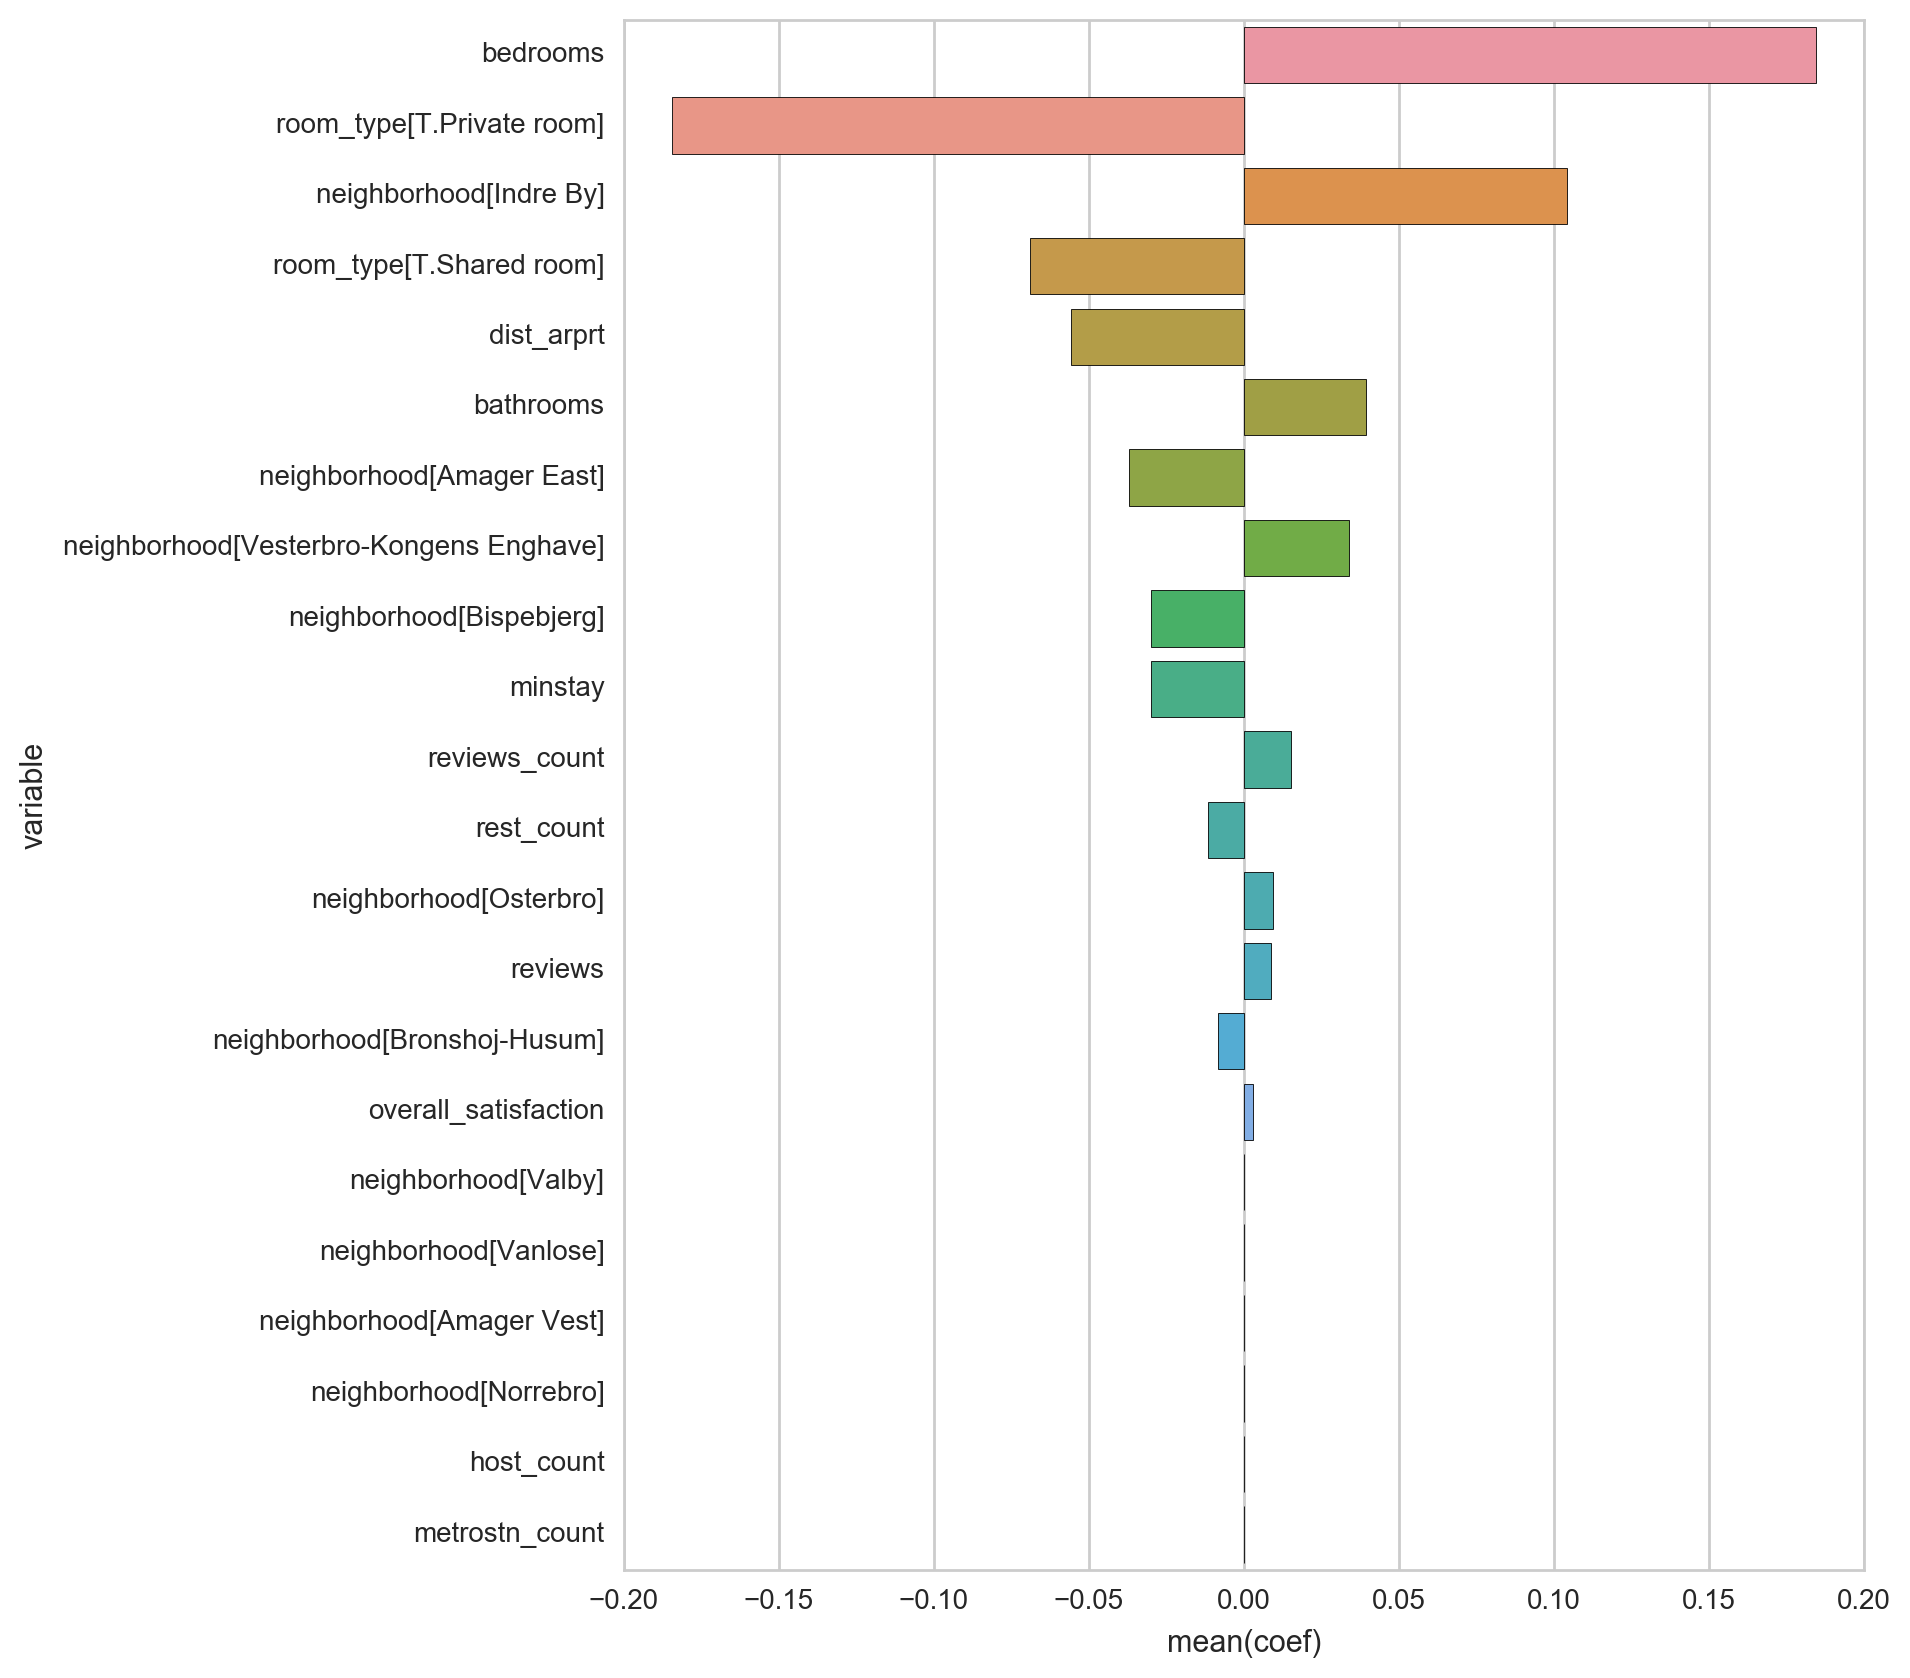

In [213]:
fig, ax = plt.subplots(figsize=(8,10))

sns.barplot(y = lasso_coef.variable, x = lasso_coef.coef, data=lasso_coef)


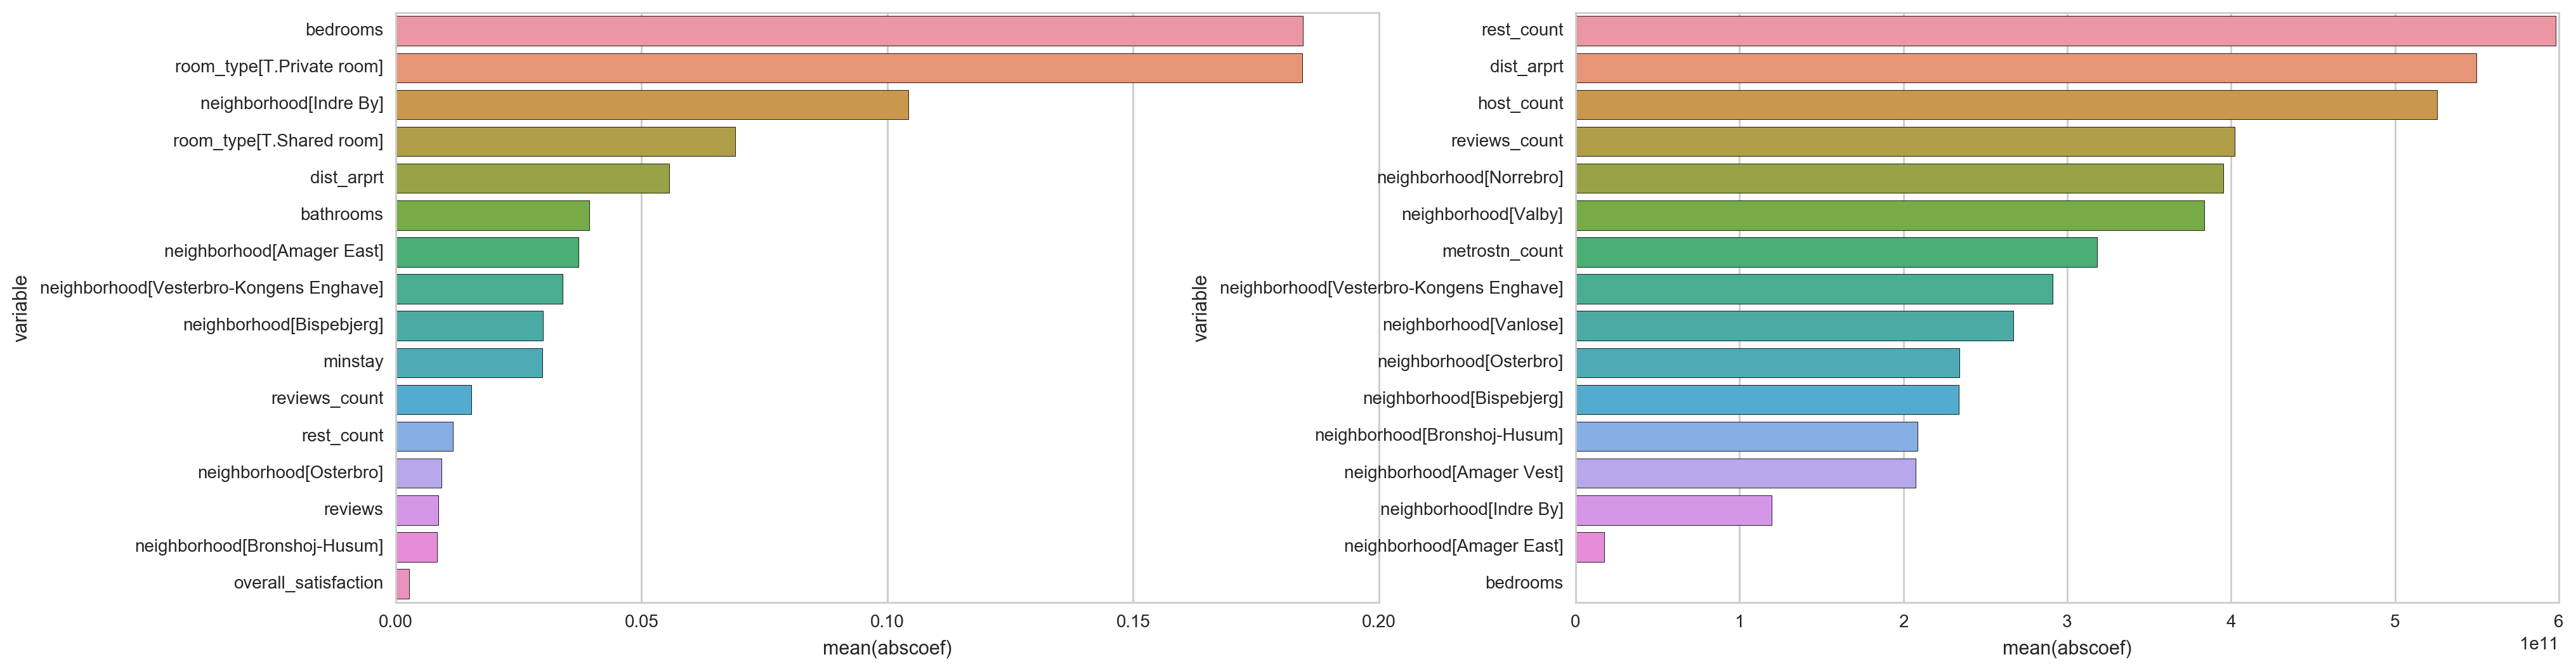

In [217]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(22,6))

sns.barplot(y = lasso_coef.loc[0:15,:].variable, x = lasso_coef.loc[0:15,:].abscoef, data=lasso_coef.loc[0:15,:],
            ax=ax1
           )
sns.barplot(y = linmod_coef.loc[0:15,:].variable, x = linmod_coef.loc[0:15,:].abscoef, data=linmod_coef.loc[0:15,:],
            ax=ax2
           )

plt.show()
